In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import keras_tuner as kt

In [19]:
import os
os.chdir(r'd:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\RE\Reconstru--o')
print(os.getcwd())

d:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\RE\Reconstru--o


In [21]:
df = pd.read_excel('CLUPEIFORME\R_RJ_Reconstrucao_Clupeiformes_2024_08_13.xlsx')

x0 = df[['Ano', 'Manjuba_ind']].dropna().values


df_x0= pd.DataFrame(x0, columns= ['Ano', 'Manjuba_ind'])


x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Manjuba_ind'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_19488\3165114578.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('CLUPEIFORME\R_RJ_Reconstrucao_Clupeiformes_2024_08_13.xlsx')


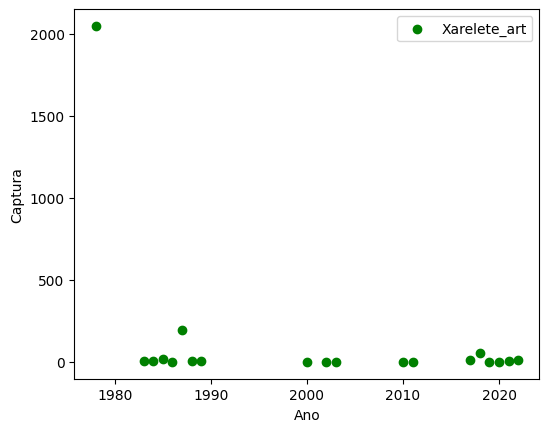

In [22]:
plt.figure(figsize=(6, 4.8))
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='Xarelete_art')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

In [23]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)))
    for i in range(hp.Int('num_layers', 2, 7)):  
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=16),  
            activation='leaky_relu'
        ))

    model.add(tf.keras.layers.Dense(1, activation='leaky_relu'))
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

  
    model.compile(
        optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mse']
    )
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='mse', 
    max_trials=10,  
    executions_per_trial=2,  
    directory='my_tuning_dir',  
    project_name='tune_Manjuba_art'
)

tuner.search(x_normalized, y_normalized, epochs=200, batch_size=12, validation_split=0.2)




Reloading Tuner from my_tuning_dir\tune_Manjuba_art\tuner0.json


In [24]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Melhor número de camadas: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Melhor número de unidades na camada {i+1}: {best_hps.get('units_' + str(i))}")
print(f"Melhor taxa de aprendizado: {best_hps.get('learning_rate')}")

Melhor número de camadas: 7
Melhor número de unidades na camada 1: 496
Melhor número de unidades na camada 2: 224
Melhor número de unidades na camada 3: 464
Melhor número de unidades na camada 4: 416
Melhor número de unidades na camada 5: 384
Melhor número de unidades na camada 6: 304
Melhor número de unidades na camada 7: 256
Melhor taxa de aprendizado: 0.01


Epoch 1/1200


C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - loss: 12.1971 - mse: 4.9150 - val_loss: 2.2524 - val_mse: 2.2524
Epoch 2/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 103.2895 - mse: 99.0082 - val_loss: 147.2840 - val_mse: 147.2840
Epoch 3/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 52.9481 - mse: 58.2183 - val_loss: 6.1152 - val_mse: 6.1152
Epoch 4/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.4316 - mse: 3.1593 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 5/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.7162 - mse: 4.4143 - val_loss: 4.1073 - val_mse: 4.1073
Epoch 6/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.6172 - mse: 7.0883 - val_loss: 2.2919 - val_mse: 2.2919
Epoch 7/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.2647 - mse: 2.8338 - val_loss: 1.5449 - val_mse: 1.5449
Epoch 8/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.8242 - mse: 2.2610 - val_loss: 0.7820 - val_mse: 0.7820
Epoch 9/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4388 

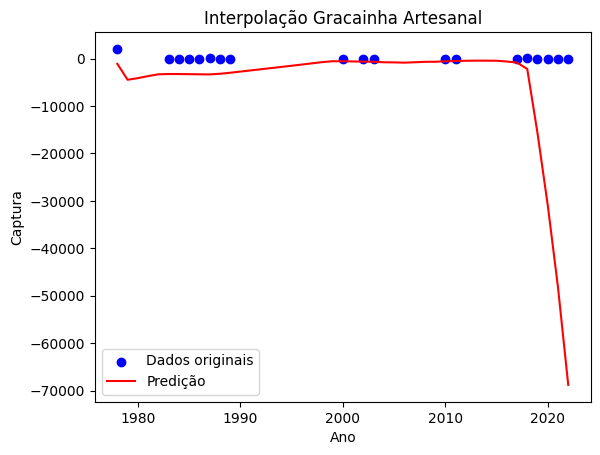

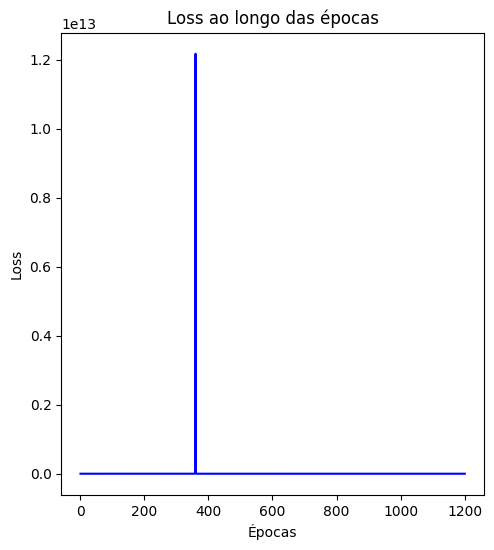

In [25]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_normalized, y_normalized, epochs=1200, batch_size=12, validation_split=0.2)


x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Interpolação Gracainha Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predição para o ano 1965: 7059702.0
Predição para o ano 1972: 2370520.0
Predição para o ano 1973: 1839173.875
Predição para o ano 1974: 1315664.625
Predição para o ano 1975: 832643.0625
Predição para o ano 1990: 0.0
Predição para o ano 1991: 0.0
Predição para o ano 1992: 0.0
Predição para o ano 1993: 0.0
Predição para o ano 1994: 0.0
Predição para o ano 2016: 0.0


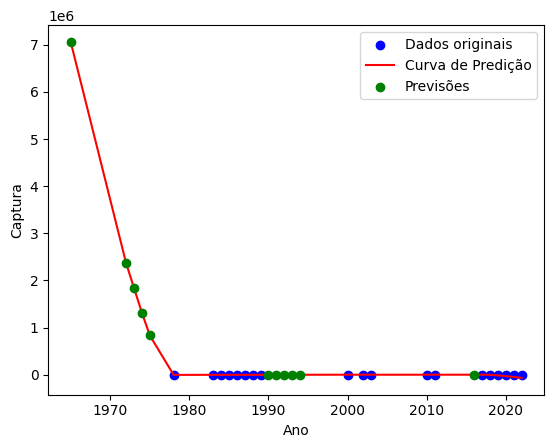

In [26]:
anos_para_prever = np.array([1965, 1972, 1973, 1974, 1975, 1990, 1991, 1992, 1993, 1994, 2016]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean
predicoes = np.maximum(predicoes, 0)

for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
#plt.title('Xarelete_art')
plt.legend()
plt.show()


In [14]:
df_combined.to_excel('interpolacao_Gracainha_art_.xlsx', index=False)